In [21]:
#Importing openCV
import cv2
import numpy as np

#Displaying image

image = cv2.imread('resources/road-marking/test_image.jpg')
cv2.imshow('input_image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [22]:
lanelines_image = np.copy(image)
gray_conversion = cv2.cvtColor(lanelines_image, cv2.COLOR_RGB2GRAY)
blur_conversion = cv2.GaussianBlur(gray_conversion, (5,5), 0)

In [23]:
canny_conversion = cv2.Canny(blur_conversion, 50, 155)

In [24]:
cv2.imshow('input_image', canny_conversion)
cv2.waitKey()
cv2.destroyAllWindows()

**Masking the region of interest**

In [25]:
# Import the required libraries:

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Next, write a function for canny edge detection
def canny_edge(image):
    gray_conversion = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur_conversion = cv2.GaussianBlur(gray_conversion, (5,5), 0)
    canny_conversion = cv2.Canny(blur_conversion, 50, 150)
    return canny_conversion

In [29]:
def reg_of_interest(image):
    image_height = image.shape[0]
    polygons = np.array([[(200, image_height), (1100, image_height), (500, 200)]])
    image_mask = np.zeros_like(image)
    cv2.fillPoly(image_mask, polygons, 200)
    return image_mask

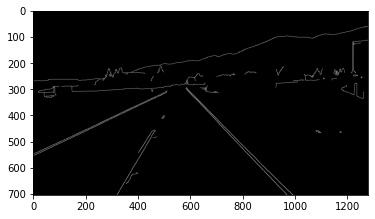

In [30]:
image = cv2.imread('resources/road-marking/test_image.jpg')
lanelines_image = np.copy(image)
canny_conversion = canny_edge(lanelines_image)
plt.imshow(canny_conversion, cmap = 'gray')

In [34]:
# We will apply region-of-interest masking 
cv2.imshow('result', reg_of_interest(canny_conversion))
cv2.waitKey()
cv2.destroyAllWindows()

**Applying bitwise_and**

In [33]:
def ROI_bitwise_and(image):
    image_height = image.shape[0]
    polygons = np.array([[(200, image_height), (1100, image_height), (500, 200)]])
    image_mask = np.zeros_like(image)
    cv2.fillPoly(image_mask, polygons, 200)
    masking_image = cv2.bitwise_and(image, image_mask)
    return masking_image

In [36]:
image = cv2.imread('resources/road-marking/test_image.jpg')
landlines_image = np.copy(image)
canny_conversion = canny_edge(landlines_image)
cropped_image = ROI_bitwise_and(canny_conversion)
cv2.imshow('result', cropped_image)
cv2.waitKey()
cv2.destroyAllWindows()

**Applying the Hough transform**

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [67]:
def canny_edge(image):
    gray_conversion = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur_conversion = cv2.GaussianBlur(gray_conversion, (5,5), 0)
    canny_conversion = cv2.Canny(blur_conversion, 50, 150)
    return canny_conversion

In [68]:
def ROI_bitwise_and(image):
    image_height = image.shape[0]
    polygons = np.array([[(200, image_height), (1100, image_height), (510, 250)]])
    image_mask = np.zeros_like(image)
    cv2.fillPoly(image_mask, polygons, 250)
    masking_image = cv2.bitwise_and(image, image_mask)
    return masking_image

In [69]:
def show_lines(image, lines):
    lines_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            X1, Y1, X2, Y2 = line.reshape(4)
            cv2.line(lines_image, (X1, Y1), (X2, Y2), (255,0,0), 10)
    return lines_image        

In [71]:
image = cv2.imread('resources/road-marking/test_image.jpg')
lanelines_image = np.copy(image)
canny_conv = canny_edge(lanelines_image)
cropped_image = ROI_bitwise_and(canny_conv)
lane_lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength= 40, maxLineGap=5)
landlines_image = show_lines(lanelines_image, lane_lines)

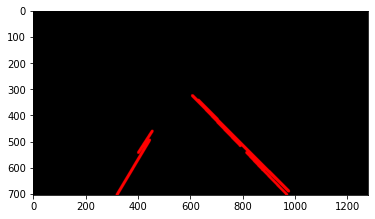

In [72]:
plt.imshow(linelines_image)

Above the image after applying the Hough transform
The image we detected is displayed on a black background. Therefore, the final step is to combine this with our original image.

In [76]:


#Combining with actual image

image = cv2.imread('resources/road-marking/test_image.jpg')
lane_image = np.copy(image)
canny = canny_edge(lane_image)
cropped_image = ROI_bitwise_and(canny)
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength= 40, maxLineGap=5)
line_image = show_lines(lane_image, lines)
combine_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)



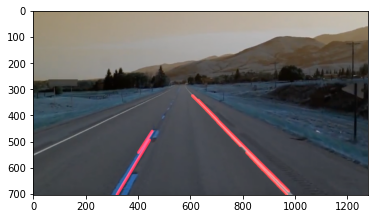

In [77]:
plt.imshow(combine_image)

In [78]:
cv2.imshow('result', combine_image)
cv2.waitKey()
cv2.destroyAllWindows()

**Optimization the detected road markings**

**Detecting road markings in video**

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def make_coordinates(image, line_parameters):
          try:
            slope, intercept = line_parameters
          except TypeError:
            slope, intercept = 0.001,0
          #slope, intercept = line_parameters
          y1 = image.shape[0]
          y2 = int(y1*(3/5))
          x1 = int((y1- intercept)/slope)
          x2 = int((y2 - intercept)/slope)
          return np.array([x1, y1, x2, y2])

In [5]:
def average_slope_intercept(image, lines):
          left_fit = []
          right_fit = []
          for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            parameter = np.polyfit((x1, x2), (y1, y2), 1)
            slope = parameter[0]
            intercept = parameter[1]
            if slope < 0:
              left_fit.append((slope, intercept))
            else:
              right_fit.append((slope, intercept))
          left_fit_average =np.average(left_fit, axis=0)
          right_fit_average = np.average(right_fit, axis =0)
          left_line =make_coordinates(image, left_fit_average)
          right_line = make_coordinates(image, right_fit_average)
  
          return np.array([left_line, right_line])


In [6]:


def canny_edge(image):
         gray_conversion= cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
         blur_conversion = cv2.GaussianBlur(gray_conversion, (5,5),0)
         canny_conversion = cv2.Canny(blur_conversion, 50,150)
         return canny_conversion



In [7]:


def show_lines(image, lines):
          line_image = np.zeros_like(image)
          if lines is not None:
            for line in lines:
              x1, y1, x2, y2 = line.reshape(4)
              cv2.line(line_image, (x1, y1), (x2, y2), (255,0,0), 10)
          return line_image



In [8]:
def reg_of_interest(image):
          image_height = image.shape[0]
          polygons = np.array([[(200, image_height), (1100, image_height), (550, 250)]])
          image_mask = np.zeros_like(image)
          cv2.fillPoly(image_mask, polygons, 255)
          masking_image = cv2.bitwise_and(image,image_mask)
          return masking_image

In [9]:
cap = cv2.VideoCapture("resources/road-marking/test2.mp4")

In [10]:


while(cap.isOpened()):
            _, frame = cap.read()
            canny_image = canny_edge(frame)
            cropped_canny = reg_of_interest(canny_image)
            lines = cv2.HoughLinesP(cropped_canny, 2, np.pi/180, 100,             np.array([]), minLineLength=40,maxLineGap=5)
            averaged_lines = average_slope_intercept(frame, lines)
            line_image = show_lines(frame, averaged_lines)
            combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
            cv2.imshow("result", combo_image)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
cap.release()
cv2.waitKey(0)
cv2.destroyAllWindows()



/home/dongchan/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/dongchan/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


error: OpenCV(4.5.1) /tmp/pip-req-build-ms668fyv/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
